<a href="https://colab.research.google.com/github/yarkalm/machinelearning/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Калмыков Я.А.**
# **Лабораторная работа по методам искусственного интеллекта (IMDB)**
# **Задание 2**


#- Подключение библиотек и загрузка датасета

In [ ]:
from tensorflow import keras
import pandas as pd
from keras import models
import matplotlib.pyplot as plt
from keras.datasets import imdb
import numpy as np
import tensorflow as tf

In [ ]:
keras.datasets.imdb.load_data(path="imdb.npz")
num_words = 10000
(data_train, target_train), (data_test, target_test) = keras.datasets.imdb.load_data(num_words = num_words)
x = np.concatenate((data_train,data_test), axis = 0)
y = np.concatenate((target_train, target_test), axis = 0)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
longest = num_words

# Закодирование отзывов

In [ ]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3,'#') for i in x[1001]] )
print(decoded)
print(sorted(set(x[0])))
print(*x[0])

1641221/1641221 [==============================] - 0s 0us/step
# i had never seen a silent movie until july 24 2005 i had never seen a movie with mary pickford in it i've seen thousands of movies very few are hypnotic to me i found last of the # and unforgettable ray liotta to be hypnotic so consider the source as you read this i started watching tess of the storm country on tcm just to see who this mary pickford was who has been credited by many for # hollywood i had no idea what i was in for two hours later i # out of it and realized i'd watched one of the most beautiful women i had ever seen playing a role perfectly suited to her imagine a movie fan in # having never seen anyone that gorgeous and that # before you would have to see her again and again the setting was perfect for a girl that # she was a poor # couldn't speak the king's english but you had to admire her what a movie time to start my mary pickford movie collection
[1, 2, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17, 18, 19

In [ ]:
pd.DataFrame.from_dict(sorted(reverse_index.items(), key=lambda x: x[0]))

,0,1
0,1,the
1,2,and
2,3,a
3,4,of
4,5,to
...,...,...
88579,88580,pipe's
88580,88581,copywrite
88581,88582,artbox
88582,88583,voorhees'


In [ ]:
pd.DataFrame.from_dict(sorted(index.items(), key=lambda x: x[1]))

,0,1
0,the,1
1,and,2
2,a,3
3,of,4
4,to,5
...,...,...
88579,pipe's,88580
88580,copywrite,88581
88581,artbox,88582
88582,voorhees',88583


# Векторизация отзывов

In [ ]:
def vectorize(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results



x = vectorize(x)
y = np.array(y).astype("float32")

x_test = x[:10000]
y_test = y[:10000]
x_train = x[10000:]
y_train = y[10000:]
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
print(*x_test[0][0:100])

0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0


In [ ]:
print(len(x_test[0]))

10000


# Создание и обучение модели

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(50, activation = "relu", input_shape=(longest, )))
# Hidden - Layers
model.add(keras.layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(keras.layers.Dense(50, activation = "relu"))
model.add(keras.layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(keras.layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [ ]:
history = model.fit(
 x_train, y_train,
 epochs= 2,
 batch_size = 500,
 validation_data = (x_test, y_test)
)

Epoch 1/2
80/80 [==============================] - 4s 38ms/step - loss: 0.4048 - accuracy: 0.8236 - val_loss: 0.2574 - val_accuracy: 0.8955
Epoch 2/2
80/80 [==============================] - 2s 30ms/step - loss: 0.2120 - accuracy: 0.9196 - val_loss: 0.2632 - val_accuracy: 0.8940


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-trai

In [ ]:
print("Accuracy: ",np.mean(history.history["val_accuracy"]))

Accuracy:  0.8947499990463257


# Графики

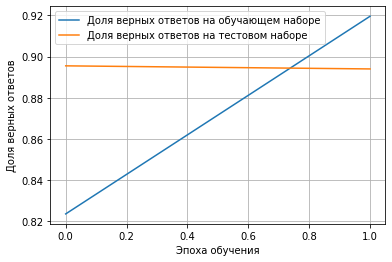

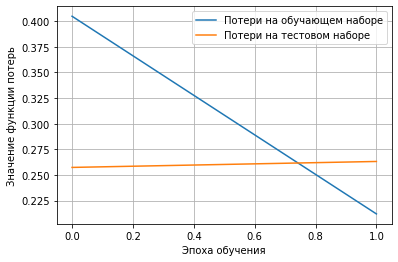

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.grid()
plt.legend()
plt.show()



plt.plot(history.history['loss'], 
         label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Потери на тестовом наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение функции потерь')
plt.grid()
plt.legend()
plt.show()

# Эксперимент

In [ ]:
rate = input()
#rate = "this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what"
coded = []

for word in rate.split(' '):
  if word in index:
    coded.append(int(index[word]))

coded =[coded]
#for code in coded:
 # print(reverse_index[code], end = ' ')
print(rate.replace('.','\n'))
print(coded)

Is it even possible to go back in time and tell my past self to not watch this movie. Waste of money. Disgrace to the original. Not worth your time. Will Smith I love your movies but by far your worst one
Is it even possible to go back in time and tell my past self to not watch this movie
 Waste of money
 Disgrace to the original
 Not worth your time
 Will Smith I love your movies but by far your worst one
[[9, 57, 611, 5, 137, 142, 8, 55, 2, 373, 58, 498, 529, 5, 21, 103, 11, 4, 5, 1, 287, 126, 116, 126, 99, 18, 31, 227, 126, 246, 28]]


In [ ]:
pred_review = model.predict(vectorize(coded))

if pred_review > 0.5:
  print('Positive review')
elif pred_review < 0.5:
  print('Negative review')
else:
  print('50/50')

1/1 [==============================] - 0s 15ms/step
Negative review
